### 数据降维
降维就是一种对高维度特征数据预处理方法。降维是将高维度的数据保留下最重要的一些特征，去除噪声和不重要的特征，从而实现提升数据处理速度的目的。在实际的生产和应用中，降维在一定的信息损失范围内，可以为我们节省大量的时间和成本。降维也成为应用非常广泛的数据预处理方法。


降维具有如下一些优点：

    1) 发掘样本间隐藏的联系，使得数据集更易使用。
    2) 减少数据容量、加速学习速度，降低算法的计算开销。
    3) 去除样本中冗余的属性和噪声。
    4) 对样本进行可视化（3维以上的数据难以可视化），使得结果容易理解。
    
降维的算法有很多，比如奇异值分解(SVD)、主成分分析(PCA)、因子分析(FA)、独立成分分析(ICA)。

# PCA
PCA全称Principal Component Analysis，即主成分分析，是一种常用的数据降维方法。它可以通过线性变换将原始数据变换为一组各维度线性无关的表示，以此来提取数据的主要线性分量。


### PCA的优化目标
将一组N维向量降为K维（K大于0，小于N），其目标是选择K个单位正交基，使得原始数据变换到这组基上后，各字段两两间协方差为0，而字段的方差则尽可能大。

数学上可以用两个字段的协方差表示其相关性
PCA解释方差并对离群点很敏感：少量原远离中心的点对方差有很大的影响，从而也对特征向量有很大的影响。

为什么要计算协方差矩阵？
对角线上是方差，非对角线是协方差；协方差为0时两者独立，其绝对值越大，两者对彼此的影响越大。

### PCA的优点与缺点
优点 
PCA 技术的一大好处是对数据进行降维的处理。我们可以对新求出的“主元”向量的重要性进行排序，根据需要取前面最重要的部分，将后面的维数省去，可以达到降维从而简化模型或是对数据进行压缩的效果。同时最大程度的保持了原有数据的信息。
PCA 技术的一个很大的优点是，它是完全无参数限制的。在 PCA 的计算过程中完全不需要人为的设定参数或是根据任何经验模型对计算进行干预，最后的结果只与数据相关，与用户是独立的。

缺点 
这一点同时也可以看作是缺点。如果用户对观测对象有一定的先验知识，掌握了数据的一些特征，却无法通过参数化等方法对处理过程进行干预，可能会得不到预期的效果，效率也不高。

### PCA和线性回归
从工作机制和得到的结果上看，PCA和线性回归方法很像，看似都是找到一个可以近似拟合原始数据的线或平面 ，尽管看上去很相似但实际上却完全不一样。

    1)主成分分析最小化的是投射误差（ProjectedError），而线性回归尝试的是最小化预测误差。 （线性回归的Cost function重点在回归值和真实值的误差，而PCA着重样本与超平面的投影距离。）
    2)主成分分析是一种无监督学习方法 ，线性回归 是一种监督学习方法 ， 
    3)线性回归的目的是预测结果，而主成分分析不作任何预测，原始数据的所有特征属性在主成分分析中都是一样对待的。
    4)线性回归的误差（ 垂直于横轴投影 ），主要成分分析的误差（ 垂直于方向向量投影 ）。

### PCA的优化目标：
  （1）对于 2 维降到 1 维：找到一个投影方向，使得投影误差和最小。
  （2）对于 n 维降到 k 维：找到 k 个向量定义的 k 维投影平面，使得投影误差和最小。
  那么投影误差又是什么呢？投影误差即为，每一个样本点到投影向量或者投影平面的距离。而投影误差和即为所有样本点到投影向量或投影平面的距离的和。
  
  那么如何寻找投影误差最小的方向呢？
  寻找到方差最大的方向即可。方差最大与投影误差最小这两个优化目标其实本质上是一样的

### PCA算法
总结一下PCA的算法步骤：
设有n条m维数据。

    1)将原始数据按列组成m行n列矩阵X
    2)将X的每一行(代表一个属性字段）进行零均值化
    3)求出协方差矩阵C =(1/m)XX的转置
    4)求出协方差矩阵的特征值及对应的特征向量
    5)将特征相关按对应特征值大小从上到下按行排列成矩阵，取前k行组成矩阵P
    6)Y=PX 即为降维到k维后的数据
    


### PCA实现过程
以下demo参考以下网站
https://www.imooc.com/article/46717

In [2]:
import numpy as np
x=np.array([2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1.1])
y=np.array([2.4,0.7,2.9,2.2,3,2.7,1.6,1.1,1.6,0.9])


#### Step 1: 求平均值以及做normalization


In [3]:
mean_x=np.mean(x)
mean_y=np.mean(y)
scaled_x=x-mean_x
scaled_y=y-mean_y
data=np.matrix([[scaled_x[i],scaled_y[i]] for i in range(len(scaled_x))])


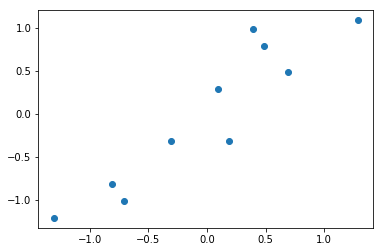

In [5]:
import matplotlib.pyplot as plt
plt.plot(scaled_x,scaled_y,'o')



#### Step 2: 求协方差矩阵(Covariance Matrix)


In [6]:
cov=np.cov(scaled_x,scaled_y)



#### Step 3: 求协方差矩阵的特征根和特征向量


In [7]:
eig_val, eig_vec = np.linalg.eig(cov)


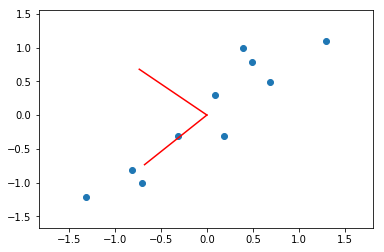

In [8]:
plt.plot(scaled_x,scaled_y,'o',)
xmin ,xmax = scaled_x.min(), scaled_x.max()
ymin, ymax = scaled_y.min(), scaled_y.max()
dx = (xmax - xmin) * 0.2
dy = (ymax - ymin) * 0.2
plt.xlim(xmin - dx, xmax + dx)
plt.ylim(ymin - dy, ymax + dy)
plt.plot([eig_vec[:,0][0],0],[eig_vec[:,0][1],0],color='red')
plt.plot([eig_vec[:,1][0],0],[eig_vec[:,1][1],0],color='red')


特征向量之间是正交的，PCA其实就是利用特征向量的这个特点，重新构建新的空间体系

特征向量代表着数据的pattern(模式),比如一条代表着y随着x的增大而增大的趋势，而另外一条，则是代表数据也有该方面的变化。所以特征向量的命名是很科学的，他代表着矩阵的特征。



#### Step 4: 选择主要成分
得到特征值和特征向量之后，我们可以根据特征值的大小，从大到小的选择K个特征值对应的特征向量。


In [11]:
eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(len(eig_val))]
eig_pairs.sort(reverse=True)

#从eig_pairs选取前k个特征向量就行

feature=eig_pairs[0][1]



#### Step 5: 转化得到降维的数据


In [13]:
new_data_reduced=np.transpose(np.dot(feature,np.transpose(data)))
print(new_data_reduced)

[[-0.82797019]
 [ 1.77758033]
 [-0.99219749]
 [-0.27421042]
 [-1.67580142]
 [-0.9129491 ]
 [ 0.09910944]
 [ 1.14457216]
 [ 0.43804614]
 [ 1.22382056]]


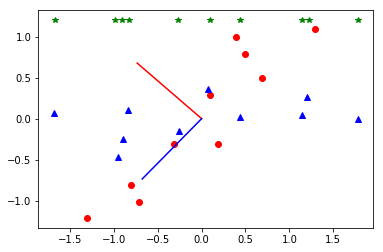

In [14]:
plt.plot(scaled_x,scaled_y,'o',color='red')
plt.plot([eig_vec[:,0][0],0],[eig_vec[:,0][1],0],color='red')
plt.plot([eig_vec[:,1][0],0],[eig_vec[:,1][1],0],color='blue')
plt.plot(new_data[:,0],new_data[:,1],'^',color='blue')
plt.plot(new_data_reduced[:,0],[1.2]*10,'*',color='green')



绿色的五角星是PCA处理过后得到的一维数据，为了能跟以前的图对比，将他们的高度定位1.2，其实就是红色圆点投影到蓝色线之后形成的点。这就是PCA,通过选择特征根向量，形成新的坐标系，然后数据投影到这个新的坐标系，在尽可能少的丢失信息的基础上实现降维。


### 应用PCA的建议

    1）PCA将一个向量映射到较低维度向量
    2）通常，您可以将数据维度降低5-10倍，而不会对算法产生重大影响

关于PCA，有不当使用

    a.使用PCA来防止过度拟合，这是不恰当的
    b.PCA丢失一些数据，但是不知道丢失的值是什么

## 奇异值分解（SVD分解 ）
SVD是提取信息的一种方法，可以把 SVD 看成是从噪声数据中抽取相关特征。从生物信息学到金融学，SVD 是提取信息的强大工具。SVD 是矩阵分解的一种类型，也是矩阵分解最常见的技术
特征值分解是一个提取矩阵特征很不错的方法，但是它只是对方阵而言的，在现实的世界中，我们看到的大部分矩阵都不是方阵，比如说有N个学生，每个学生有M科成绩，这样形成的一个N * M的矩阵就不可能是方阵，我们怎样才能描述这样普通的矩阵呢的重要特征呢？奇异值分解可以用来干这个事情

### 基于SVD分解协方差矩阵实现PCA算法

1) 去平均值，即每一位特征减去各自的平均值。

2) 计算协方差矩阵（covariance matrix）Sigma。

3) 对协方差矩阵执行SVD矩阵分解，得到矩阵U ∑ V，协方差矩阵的特征值与特征向量。（D_{m*n} = U_{m*k} * ∑_{k*k} * V_{k*n}）分解结果中U为左奇异向量（left singular vectors），Σ为奇异值矩阵，V为右奇异向量（right singular vectors）。

4) 对特征值（U）从大到小排序，选择其中最大的k个作为新线性空间的一组基向量\(U_{reduce}\)。然后将其对应的k个特征向量分别作为列向量组成特征向量矩阵。

5) 将数据转换到k个特征向量构建的新空间中。

注意到我们的SVD也可以得到协方差矩阵XTX最大的d个特征向量张成的矩阵，但是SVD有个好处，有一些SVD的实现算法可以不求先求出协方差矩阵XTX，也能求出我们的右奇异矩阵V。也就是说，我们的PCA算法可以不用做特征分解，而是做SVD来完成。这个方法在样本量很大的时候很有效。



### SVD 算法特点
优点：简化数据，去除噪声，优化算法的结果

缺点：数据的转换可能难以理解
使用的数据类型：数值型数据




### 选择合适的k
在数据降维中一个重要的问题是如何选择合适的\(k\)，即应该降到什么维度。一个典型的选择方式是“对数据降维，并且保留原数据99%的方差”？？？？

选择合适的k
在数据降维中一个重要的问题是如何选择合适的k，即应该降到什么维度。一个典型的选择方式是“对数据降维，并且保留原数据99%的方差”，方差被认为是特征中包含信息多少的度量（有时被称为能量energy），形式化为选择最小的k，满足：